# 통계적 방법에 의한 모델 비교

** 분류모델의 통계적 성능 평가 **
- RepeatedStratifiedKFold를 사용하여 그룹화를 10번 10회 총 100번의 split 학습 진행
- 각 모델별 split 100개의 score가 발생
- 모델의 성능이 더 나은지 같은지 판단하기 위해 통계적 분석 사용
   - 비교하려는 두 모델의 성능의 차이 벡터를 사용
   - 각 split의 성능의 차이를 데이터 세트로하는 확률분포를 구하고, 이에대한 t-검정과 p-value를 계산
   - 귀무가설은 mu=0, 즉 두 성능의 차이는 0이다, 두 모델의 성능이 같다, model2가 model1과 거의 같다로 볼 수 있다.
   - p-value가 유의수준 5%, 1%보다 작으면 귀무가설 기각, 대립가설 채택 : model1이 더 좋다.
   - p-value가 유의수준보다 크면 귀무가설 채택 : 두 모델은 성능이 거의 같다.
   - 통계 방법에 따라서 p-value 값이 달라진다.
   - 분류모델의 성능 평가시 베이지안 추정을 사용하는 것이 더 정확하다는 논문에 의거하여 베이지안 추정을 측정해 비교한다.
- 빈도주의적 접근 방법 : 
   - 수정 t-검정, p-value를 구하고, 일반 t-검정, p-value의 값과 비교
   - Neauda and Bengio의 방법을 사용하여 수정된 표준편차 사용
   - corrected t-test를 계산하고, 스튜던트 t분포 확률변수 생성기의 생존함수에 사용하여 우측 꼬리 t검정의 p-value를 구한다.
   - 일반적인 t-통계량(표본평균을 표본표준편차로 나눈 값)을 구하고, 스튜던트 t분포 확률변수에 적용하여 p-value를 구한다.
   - 즉 corrected statics와 uncorrected statics 값을 비교한다. 
   - 결과가 다르다. ---> 이를 보완하기 위해 베이지안 추정법을 사용하여 모델 성능 비교를 한다.
- 베이즈 추정법 사용
   - 베이즈 정리를 사용하여, 주어진 데이터 {x_1, x_N}를 기반으로 모수 mu의 조건부 확률분포 p(mu| x_1,...,x_N)을 구한다.
   - 베이즈 추정법을 사용하여 모수를 구하는 두가지 방법은 모수적방법(다른 확률분포로 추정된 모수의 분포를 나타냄)과 비모수적방법(MCMC, 추정한 모수와 동일한 분포의 실제 표본집합을 생성하여 히스토그램이나 최빈값으로 나타냄)이 있음.
   - 베이즈 추정법을 사용하여 여러 분포의 모수를 추정할 수 있게 된다.
   - 여기에서는 성능의 차이 데이터 표본을 사용하므로, 이 표본의 확률변수의 확률분포를 추정한 후 pdf, cdf로 구간의 확률을 계산하여 두 모델의 성능의 차이에 대한 신뢰도를 구하는 방식이다.
   - 사후확률을 구하기 위해 사전확률 분포를 정의하고 여기에 가능도함수를 곱한다. (베이즈 정리)
   - 여기에서 베이즈 추정을 하기 위해 Benavoli의 논문에서 사용된 방법을 사용한다. 
      - https://www.jmlr.org/papers/volume18/16-305/16-305.pdf : 분류 모델 비교를 위해 베이즈 분석을 적용하는 것이 더 좋다는 논문
   - 가능도 함수에 대한 켤레 사전확률분포를 사용(사전, 사후 확률분포가 모수값만 다르고 함수형태가 같은 pdf)한다.
      - 즉 가능도와 모수는 다르고 형태는 같은 켤레 사전확률분포, 여기에서는 정규감마분포를 사용한다는 의미.
   - 이렇게 하면 사후확률 분포가 정규분포가 되고 스튜던트 t 분포로 정의할 수 있게 된다는 것.
   - 스튜던트 t분포의 분산으로 Neauda and Begio의 corrected variance를 적용할 수 있다.
   - 이 스튜던트 t분포의 확률밀도함수 pdf로부터 데이터 표본인 성능의 차이의 평균값들의 확률을 구할 수 있다는 것.
   - pdf의 구간의 면적은 cdf의 값의 차이로 구할 수 있다. 
      - cdf의 도함수가 pdf이다. pdf의 면적 즉 적분값은 cdf의 구간의 차이 값과 같다.
      - 어떤 값의 확률을 알기 위해서 연속확률변수의 구간의 확률로 구할 수 있다.
   - 따라서 pdf의 0~무한대 구간의 면적 우측검정은 model1이 model2보다 더 성능이 좋을 확률을 의미(더 가능성이 크다는 것)이고, 음의 무한대~0의 면적 좌측검정은 model1이 model2보다 성능이 더 작을 확률, 가능성을 의미한다.
   - 두 모델이 동등한지에 대한 확률을 구하기 위해서 성능차이의 평균이 0.0인 지점의 +- 0.01(1%) 구간의 확률을 측정한다.
      - 성능차이가 5% 미만일 때를 기준으로 삼을 수도 있다. 
   - Region of Practical Equivalence (ROPE) 구간을 [-0.01, 0.01]로 설정한 후 cdf를 계산하면, 해당 영역 즉 성능차이가 0.0이 구간의 확률을 계산할 수 있다.
      - cdf(interval[1]) - cdf(interval[0]) = 0.435 = 43%의 확률로 두 성능이 같다.
   - 스튜던트t 확류변수 객체의 interval 매서드를 사용하면, 원하는 50%, 75%, 95% 신뢰도를 갖는 구간을 측정할 수 있다.
      - probs = [0.5, 0.75, 0.95], student_t.interval(probs[i])
      - 확률 = 면적이 0.5인 구간, 0.75인 구간, 0.95인 구간이 반환된다. 
- 두 모델이 아니라 모든 모델별로 빈도주의적 접근, 베이즈 추정법을 사용하여 성능을 비교할 수 있다.
   - 빈도주의적 접근으로 corrected pair t-test를 사용하는 경우 여러번 통계테스트를 해야하므로 다중비교문제(multiple comparisons problem)이 발생하게 된다.
      - https://en.wikipedia.org/wiki/Multiple_comparisons_problem : 다중 가설검증의 분류 문제, 여러 가설을 검정하면 1종 오류(귀무가설이 실제로 맞음에도 오류로 분류하게됨)가 범하게 된다.
      - 이를 보완하기 위해서 Bonferroni correction(본페로니 보정)을 적용하는데, p-value에 비교횟수값(조합값)을 곱해준다.
   - 베이즈 추정법을 사용할 때는 이러한 문제가 발생하지 않는다.


## 초승달 형 데이터 세트 생성
- 선형으로 분류되지 않는 초승달 형의 데이터 세트
   - 2개의 클래스
   - 선형 판별경계로 풀기 힘들다. SVM의 rbf, linear, poly kernel을 사용

In [1]:
from sklearn.datasets import make_moons

X, y = make_moons(noise=0.352, random_state=1, n_samples=100)

X.shape, y.shape

((100, 2), (100,))

In [2]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([50, 50], dtype=int64))

In [3]:
%matplotlib inline

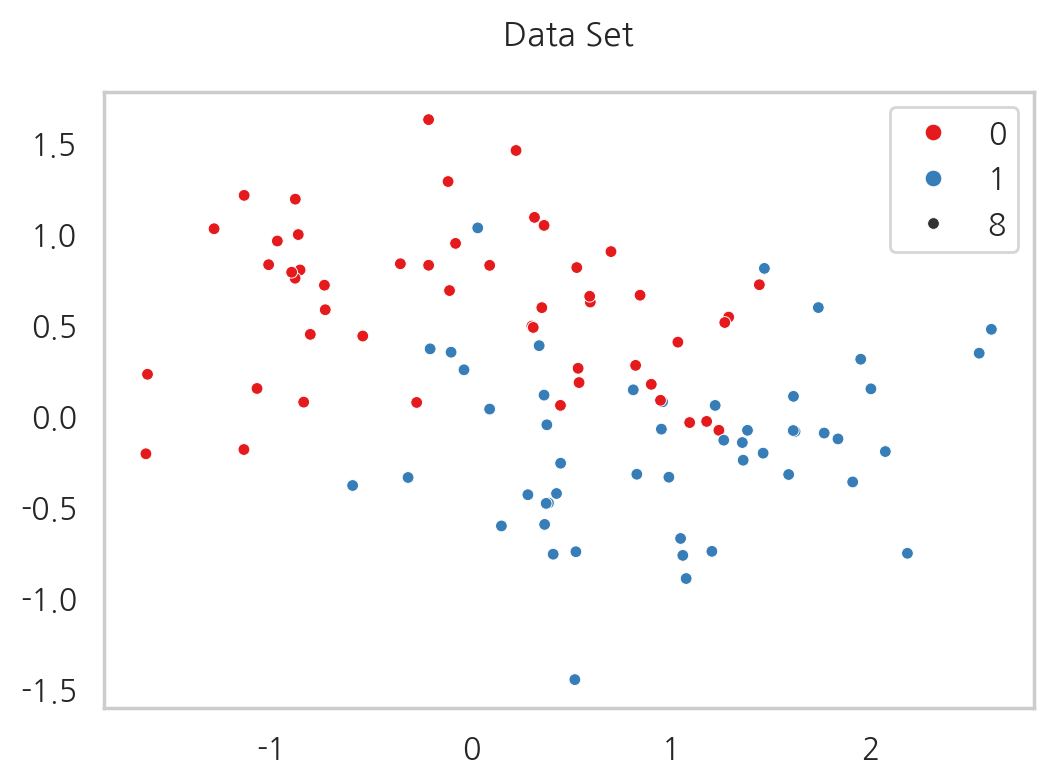

In [5]:
plt.figure()
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, marker="o", size=8, palette="Set1")
plt.title("Data Set", y=1.05)
plt.grid(False)
plt.show() ; 

## 모델링
- model : SVC
- cv : RepeatStratifiedKFold()
   - n_splits=10
   - n_repeats=10
   - 10 * 10 = 100번 실험
- score : roc_auc_score()

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score

In [7]:
%%time

svc = SVC(random_state=0)

param_grid = [
    {"kernel": ["linear"]},
    {"kernel": ["rbf"]},
    {"kernel": ["poly"], "degree": [2, 3]}
]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)
gs = GridSearchCV(estimator=svc, param_grid=param_grid, scoring="roc_auc", cv=cv)
gs.fit(X, y)

CPU times: total: 1.12 s
Wall time: 1.18 s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=0),
             estimator=SVC(random_state=0),
             param_grid=[{'kernel': ['linear']}, {'kernel': ['rbf']},
                         {'degree': [2, 3], 'kernel': ['poly']}],
             scoring='roc_auc')

## GCV의 fitting 결과
- 어떤 모형의 성능이 더 좋은지 알 수 있다.
- 여기에 더하여 AUC score를 통해 모델의 성능을 대조하여 통계적 비교를 해야한다.
- RepeatedStratifiedKFold()를 통해서 10번의 교차검증을 10번 시행했으므로, 각 모델에는 100개의 AUC 점수가 있다. 
   - AUC 점수가 독립적이라고 볼 수 없다.
   - 모델간의 상관관계가 증가하게 된다.
   - 데이터를 분리할 때 클래스가 불균형일 수 있으므로, 이러한 경우 모델의 성능이 함께 올라가거나 함께 낮아질 수 있다는 의미(??)
   - 모델의 모든 AUC를 나타내고 상관관계를 계산하여 분할효과에 대해 확인 해 본다.

In [8]:
result_df = pd.DataFrame(gs.cv_results_)
result_df = result_df.sort_values("rank_test_score")
result_df = result_df.set_index(
    result_df["params"].apply(lambda x : "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
result_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
rbf,{'kernel': 'rbf'},1,0.9400,0.079297
linear,{'kernel': 'linear'},2,0.9300,0.077846
3_poly,"{'degree': 3, 'kernel': 'poly'}",3,0.9044,0.098776
2_poly,"{'degree': 2, 'kernel': 'poly'}",4,0.6852,0.169106


In [10]:
pd.DataFrame(gs.cv_results_)["params"].apply(lambda x: "_".join(str(v) for v in x.values()))

0    linear
1       rbf
2    2_poly
3    3_poly
Name: params, dtype: object

In [11]:
# 100개의 split test score 컬럼 검색

model_scores = result_df.filter(regex=r"split\d*_test_score")
model_scores

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,...,split90_test_score,split91_test_score,split92_test_score,split93_test_score,split94_test_score,split95_test_score,split96_test_score,split97_test_score,split98_test_score,split99_test_score
kernel,,,,,,,,,,,,,,,,,,,,,
rbf,0.92,0.72,0.76,0.92,1.00,1.00,1.00,1.00,0.96,1.00,...,0.96,0.88,1.00,0.72,0.92,1.00,0.96,1.00,1.00,0.84
linear,0.96,0.84,0.76,0.92,1.00,0.96,0.96,1.00,0.92,1.00,...,0.96,0.92,1.00,0.76,0.92,1.00,0.92,0.92,1.00,0.84
3_poly,1.00,0.72,0.76,0.92,1.00,0.88,0.96,0.84,0.96,0.96,...,0.92,0.92,1.00,0.68,0.96,1.00,0.96,0.92,1.00,0.56
2_poly,0.76,0.64,0.56,0.72,0.28,0.68,0.76,1.00,0.72,0.64,...,0.68,0.60,0.88,0.52,0.48,0.68,0.68,0.76,0.84,0.52


In [12]:
model_scores.mean(axis=1)

kernel
rbf       0.9400
linear    0.9300
3_poly    0.9044
2_poly    0.6852
dtype: float64

### split에 따른 모델 성능(AUC)의 변화
- 모델별 100번의 측정 성능, 모델별 점수의 상관관계를 확인 할 수 있다. 
- 즉 데이터 세트를 어떻게 split 했느냐에 따라서 모델의 성능이 변화한다.
- 데이터 샘플의 독립성을 가정하면 통계테스트에서 계산된 "분산"을 과소평가하게 되는 오류가 있을 수 있다.
- 이러한 것을 보완하기 위해서 수정된 분산 통계 테스트를 사용할 수 있다.
   - Nadeau, Bengio corrected t-test
- model의 성능의 변화에 의존성이 있는 것으로 보임

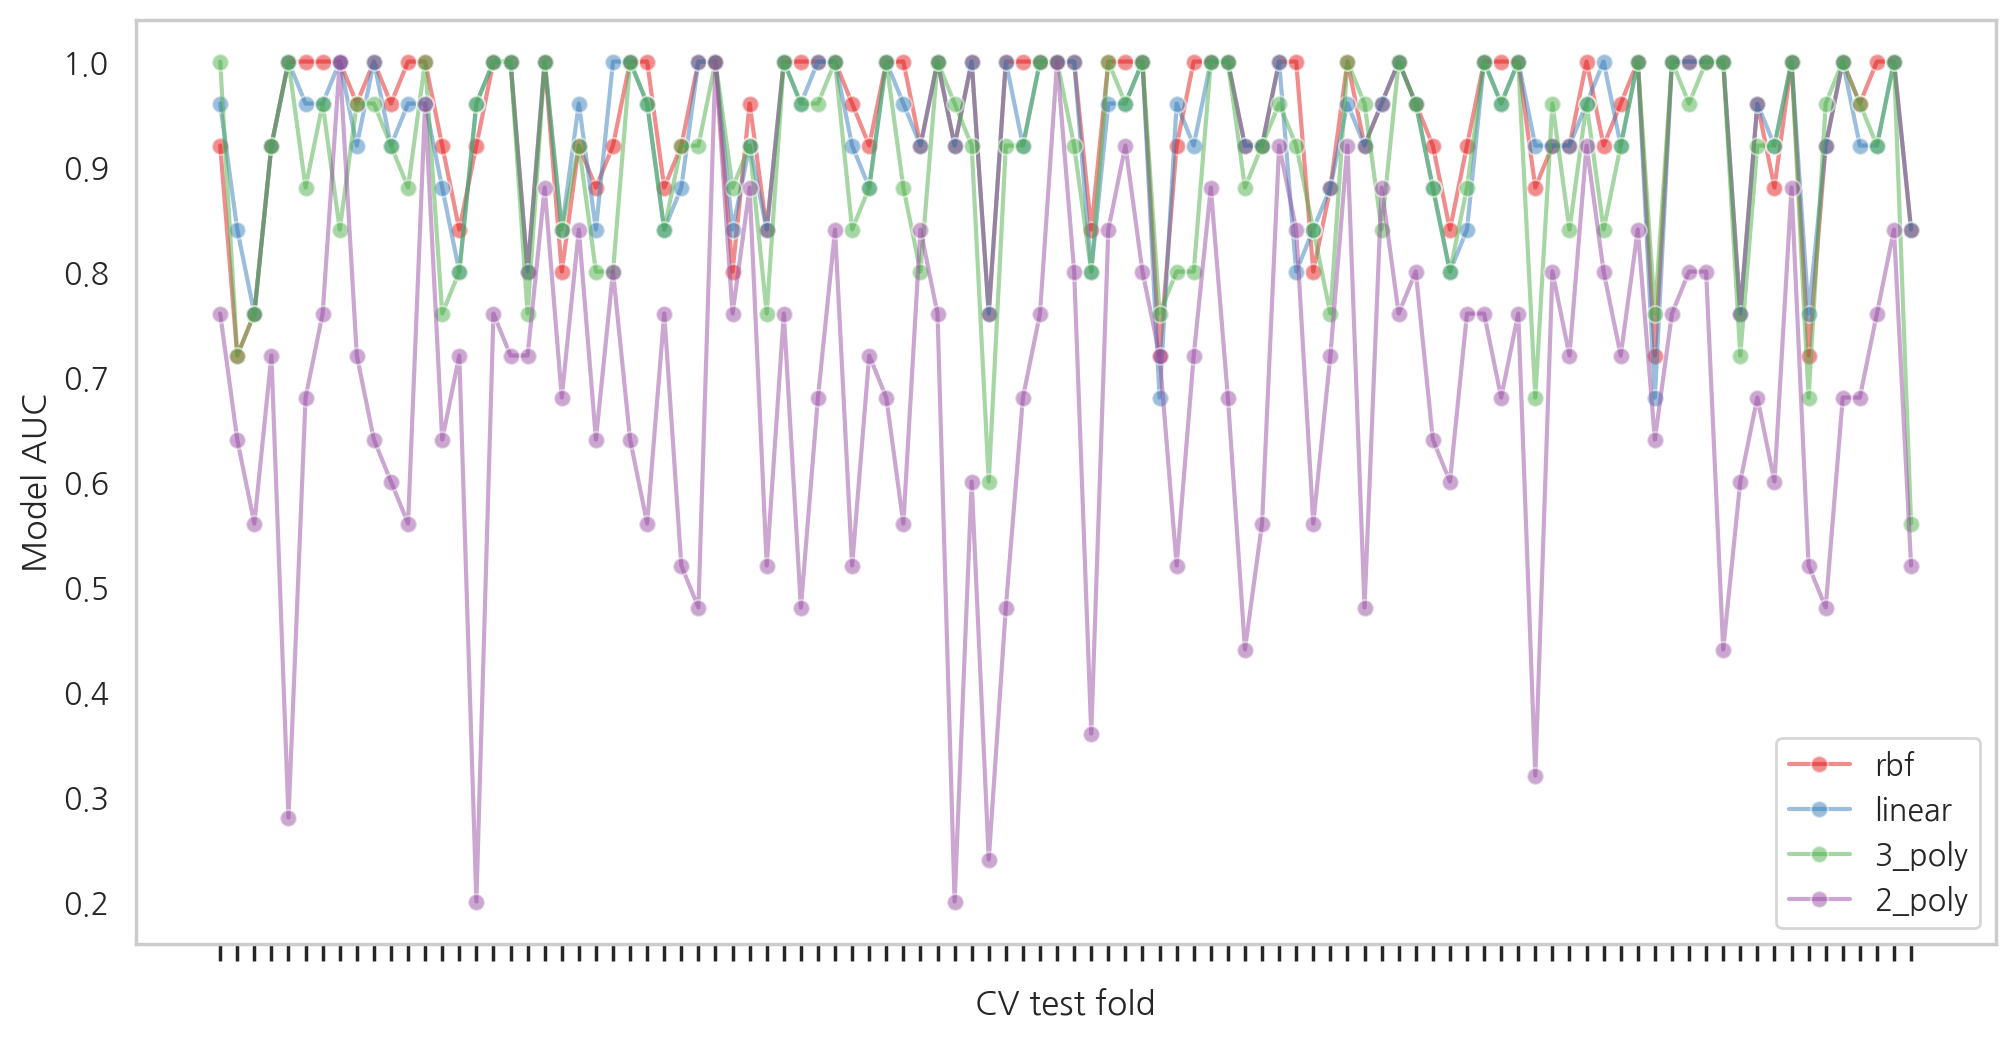

correlation of AUC models : 
 kernel       rbf    linear    3_poly    2_poly
kernel                                        
rbf     1.000000  0.882561  0.783392  0.351390
linear  0.882561  1.000000  0.746492  0.298688
3_poly  0.783392  0.746492  1.000000  0.355440
2_poly  0.351390  0.298688  0.355440  1.000000


In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=model_scores.transpose(),
            dashes=False,
            palette="Set1",
            marker="o",
            alpha=0.5,
            ax=ax)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model AUC", size=12)
ax.tick_params(bottom=True, labelbottom=False)
plt.legend(loc="best")
plt.grid(False)
plt.show() ; 

print(f"correlation of AUC models : \n {model_scores.transpose().corr()}")

In [15]:
model_scores.T.iloc[90:]

kernel,rbf,linear,3_poly,2_poly
split90_test_score,0.96,0.96,0.92,0.68
split91_test_score,0.88,0.92,0.92,0.60
split92_test_score,1.00,1.00,1.00,0.88
split93_test_score,0.72,0.76,0.68,0.52
split94_test_score,0.92,0.92,0.96,0.48
split95_test_score,1.00,1.00,1.00,0.68
split96_test_score,0.96,0.92,0.96,0.68
split97_test_score,1.00,0.92,0.92,0.76
split98_test_score,1.00,1.00,1.00,0.84
split99_test_score,0.84,0.84,0.56,0.52


## 모델 성능의 의존성
- 즉 상호관계성이 높은 모델들은 성능의 작은 차이를 무시하고 같은 성능을 가졌다고 판단할 수 있을까?

In [16]:
model_scores.T.corr()

kernel,rbf,linear,3_poly,2_poly
kernel,,,,
rbf,1.000000,0.882561,0.783392,0.351390
linear,0.882561,1.000000,0.746492,0.298688
3_poly,0.783392,0.746492,1.000000,0.355440
2_poly,0.351390,0.298688,0.355440,1.000000


### 두 모델의 비교 : 빈도주의적 접근
- rank 1 모델이 rank 2 모델 보다 더 좋은가?
   - 빈도주의적 접근의 비교 : t-test, p-value
   - Diebold-Mariano 논문
- t-test : 검정 통계량, t-통계량 : 모수 추정에서 판단의 근거가 되는 통계량 중 하나.
- the Neauda ans Bengio's paired corrected t-test
   - 낮은 false positive, false negative를 유지하면서 highest replicability scores를 얻을 수 있는 방법
   - 복제성 점수 : 동일한 데이터 세트의 다른 무작위 파티션에서 모델을 평가할 때 모델의 성능이 얼마나 비슷한지를 평가하는 방식
   - k : split 값
   - r : repeated 값
   - x_i,j : i, j 모델성능의 차이
   - n_test : 테스트에 사용된 샘플의 수
   - n_train : 학습에 사용된 샘플의 수
   - 시그마제곱햇 : 관찰된 차이의 분산
   - 모든 모델의 차이의 합을 차이의 분산으로 나눈 어떤 값
   
$t = \dfrac{\dfrac{1}{k*r} \sum_{i=1}^{k} \sum_{j=1}^{r} x_{i,j}}{\sqrt{\left(\dfrac{1}{k*r} + \dfrac{n_{test}}{n_{train}} \right)  \hat{\sigma^2}}}$

- 귀무가설 : "2번째 모델은 1번째 모델만큼 성능이 좋다", "두 모델은 성능의 차이가 없다."

#### cv_results_의 mean_test_score는 각 split 별 test score의 평균값

In [17]:
result_df[["params", "mean_test_score", "std_test_score", "rank_test_score"]]

,params,mean_test_score,std_test_score,rank_test_score
kernel,,,,
rbf,{'kernel': 'rbf'},0.9400,0.079297,1
linear,{'kernel': 'linear'},0.9300,0.077846,2
3_poly,"{'degree': 3, 'kernel': 'poly'}",0.9044,0.098776,3
2_poly,"{'degree': 2, 'kernel': 'poly'}",0.6852,0.169106,4


In [18]:
model_scores.mean(axis=1)

kernel
rbf       0.9400
linear    0.9300
3_poly    0.9044
2_poly    0.6852
dtype: float64

### corrected t,p value 와 uncorrected t,p value
- Neauda-Bengio corrected paired t-test와 uncorrected p-value 값을 통하여 귀무가설을 검정한다.

$t = \dfrac{\dfrac{1}{k*r} \sum_{i=1}^{k} \sum_{j=1}^{r} x_{i,j}}{\sqrt{\left(\dfrac{1}{k*r} + \dfrac{n_{test}}{n_{train}} \right)  \hat{\sigma^2}}}$

In [19]:
# 스튜던트 t 분포

from scipy.stats import t

In [20]:
# 수정 표준편차 : 분모의 값

def corrected_std(differences, n_train, n_test) : 
    
    kr = len(differences)
    corrected_var = np.var(differences, ddof=1) * (1/kr + n_test/n_train)
    corrected_std = np.sqrt(corrected_var)
    
    return corrected_std

In [21]:
def compute_corrected_ttest(differences, df, n_test, n_train) : 
    
    mean = np.mean(differences)
    std = corrected_std(differences, n_test, n_train)
    t_stat = mean / std
    # 스튜던트 t 분포의 생존함수 : 1 - cdf (cdf : 누적밀도함수)
    p_val = t.sf(np.abs(t_stat), df)
    
    return t_stat, p_val

In [22]:
model_1_scores = model_scores.iloc[0].values
model_2_scores = model_scores.iloc[1].values

differences = model_1_scores - model_2_scores
differences

array([-4.00000000e-02, -1.20000000e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.00000000e-02,  4.00000000e-02,  0.00000000e+00,
        4.00000000e-02,  0.00000000e+00,  4.00000000e-02,  4.00000000e-02,
        4.00000000e-02,  4.00000000e-02,  4.00000000e-02, -4.00000000e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.00000000e-02, -4.00000000e-02,  4.00000000e-02, -8.00000000e-02,
        0.00000000e+00,  4.00000000e-02,  4.00000000e-02,  4.00000000e-02,
        0.00000000e+00,  0.00000000e+00, -4.00000000e-02,  4.00000000e-02,
        0.00000000e+00,  0.00000000e+00,  4.00000000e-02,  0.00000000e+00,
        0.00000000e+00,  4.00000000e-02,  4.00000000e-02,  0.00000000e+00,
        4.00000000e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.11022302e-16,  0.00000000e+00,  8.00000000e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.00000000e-02,
        4.00000000e-02,  

In [23]:
# df : degree of freedom

n = differences.shape[0]
df = n - 1

print(f"n : {n}, df : {df}")

n : 100, df : 99


In [24]:
# cv의 split 매서드로부터 train, test set의 index를 반환

list(cv.split(X, y))[0][0]

array([ 0,  1,  3,  4,  5,  6,  8,  9, 10, 11, 12, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 85, 86, 87, 88, 89, 90, 91,
       94, 95, 96, 97, 98])

In [25]:
n_train = len(list(cv.split(X, y))[0][0]) # train set의 길이
n_test = len(list(cv.split(X, y))[0][1]) # test set의 길이

print(f"len of train set : {n_train}, len of test set : {n_test}")

len of train set : 90, len of test set : 10


### corrected p-value의 의미
- model 1과 model 2의 성능의 차이를 통해서 성능에대한 귀무가설을 검정
- 가설
   - 귀무가설 : model 2의 성능과 model 1의 성능은 같다. 
      - \mu_1 - \mu_2 = 0
   - 대립가설 : model 2의 성능과 model 1의 성능은 같지 않다.
- p-value : 유의확률
   - 22% 로 유의수준보다 크므로 귀무가설을 기각할 수 없다. 
   - 즉 model 2의 성능은 model 1과 같다고 말할 수 있다.

In [27]:
t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"corrected t-value : {t_stat:.3f}\ncorrected p-value : {p_val:.3f}")

corrected t-value : 0.750
corrected p-value : 0.227


### uncorrected t-test, p-value
- t_stat_uncorrected : t-통계량
- p_val_uncorrected : 스튜던트 t분포의 생존함수 값
   - 0.005로 유의수준 보다 작으므로 귀무가설을 기각할 수 있다.
   - 즉 model 1과 model 2는 같다고 할 수 없다.

In [28]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1)/n)
t_stat_uncorrected

2.6111648393354643

In [29]:
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)
p_val_uncorrected

0.0052130131503932385

In [30]:
print(f"uncorrected t-test : {t_stat_uncorrected:.3f}\nuncorrected p-value : {p_val_uncorrected:.3f}")

uncorrected t-test : 2.611
uncorrected p-value : 0.005


### 성능 데이터의 분포

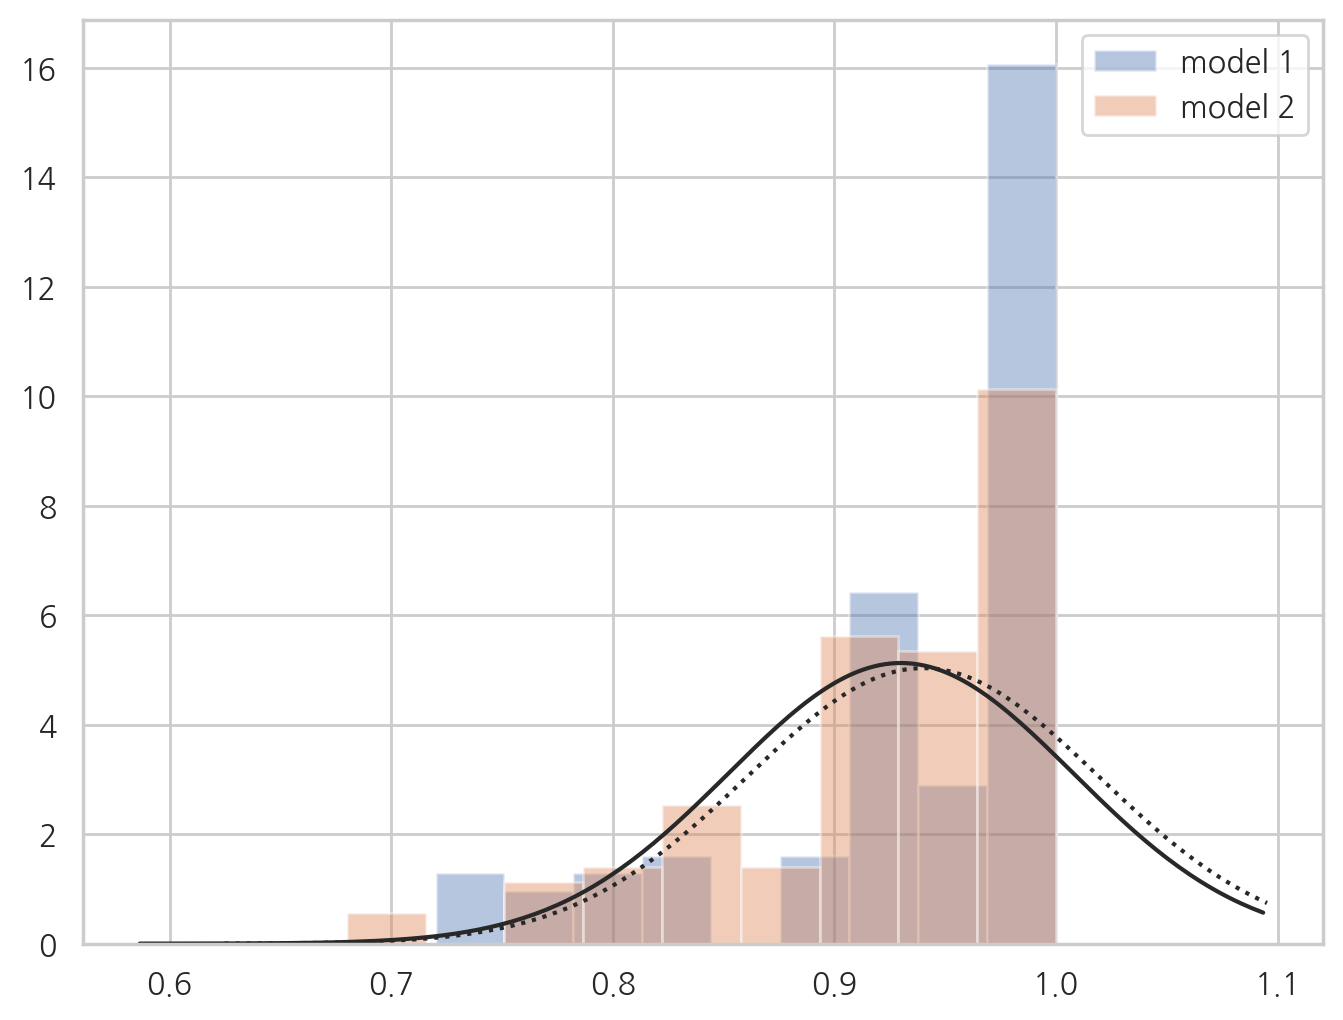

In [31]:
plt.figure(figsize=(8, 6))
ax = sns.distplot(model_scores.iloc[0].values, kde=False, fit=sp.stats.norm, 
                  label="model 1")
ax = sns.distplot(model_scores.iloc[1].values, kde=False, fit=sp.stats.norm,
                  label="model 2")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show() ; 

### 두 모델의 성능 비교 : 베이지안 추정법 사용
- 베이즈 추정법을 사용하여 모델의 성능을 비교
- 사전확률분포를 켤레사전확률분포인 정규-감마분포를 사용하여, 사후확률의 분포를 정규분포로 정의함
   - 사전확률분포를 켤레사전확률분포로 정의하면 사후확률의 분포가 이 켤레사전확률분포와 형태가 같아진다.
- pdf와 cdf를 통해 성능차이 구간의 확률을 추정하여 비교
- 베이지안 추정을 사용하여 model1이 model2 보다 더 좋을 확률을 계산한다.
   - 사후확률분포 = 가능도분포 * 사전확률분포 / 확률질량함수
      - 모수적 방법 : 다른 확률분포를 사용하여 추정된 모수의 분포를 나타내는 방식
      - 비모수적 방법 : 모수의 분포와 동일한 분포를 가지는 실제 표본집합을 만들고, 히스토그램이나 최빈값 등으로 나타낸다. (MCMC 방법)
   - 두 모형의 성능 차이의 평균 mu의 분포를 출력해준다.
   - split1의 차이, split2의 차이, ..., split100의 차이의 평균
- Benavoli의 추정 방식
   - 두 분류기의 성능을 비교하기 위해, 켤레(conjugate) 사전확률분포로 정규감마분포를 사용한다.
   - 켤레 사전확률분포를 사용한 베이즈 정리는 사후분포와 사전분포가 모수는 다르고 형태가 같아진다.
   - 사후분포도 정규분포가 된다.
      - 사후분포를 marginalizing하면 평균 파라미터의 사후분포를 스튜던트-t분포로 정의할 수 있다. 
      - 스튜던트t 분포의 분산으로 Nadeau and Bengios 의 수정 분산을 사용한다.

In [33]:
# 스튜던트 t분포 확률변수 : scale: 표준편차, loc: 기댓값
# posterior prob dist : student-t

t_post = t(
    df, loc=np.mean(differences), scale=corrected_std(differences, n_train, n_test)
)
t_post

#### 성능차이라는 데이터 표본에 대한 모수의 조건부확률분포
- 성능차이라는 데이터 표본이 주어졌을 때 모수 mu의 조건부확률의 pdf
- 베이즈 추정에 의해 사후확률분포에 해당

In [46]:
x = np.linspace(t_post.ppf(0.001), t_post.ppf(0.999), 100)

x.min(), x.max()

(-0.03231041089954392, 0.05231041089954389)

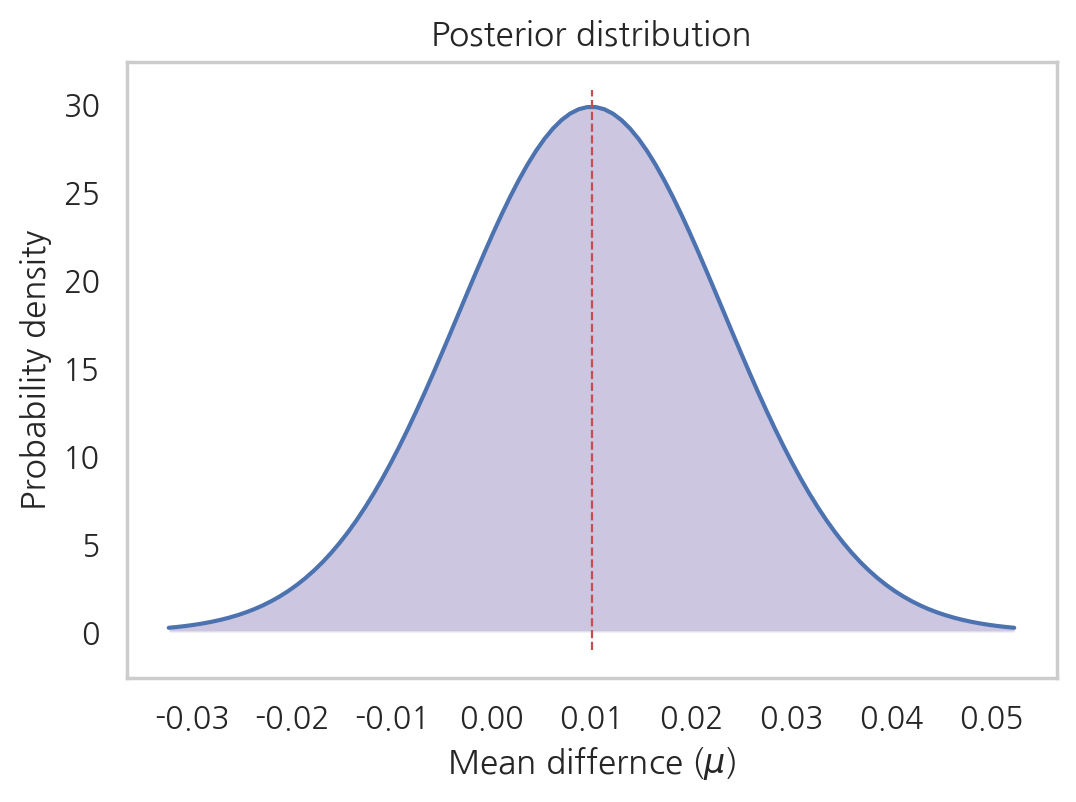

In [37]:
dist_x = np.linspace(t_post.ppf(0.001), t_post.ppf(0.999), 100)

plt.plot(dist_x, t_post.pdf(dist_x), label="pdf")
plt.xticks(np.arange(-0.04, 0.06, 0.01))
plt.fill_between(dist_x, t_post.pdf(dist_x), 0, facecolor="m", alpha=0.4)
plt.vlines(np.mean(differences), ymin=0-1, ymax=np.max(t_post.pdf(dist_x))+1, color="r", linestyle="--", linewidth=0.8, label="mean of diff")

plt.xlabel(r"Mean differnce ($\mu$)")
plt.ylabel("Probability density")
plt.grid(False)
plt.title("Posterior distribution")
plt.show() ;

### 베이지안 추정을 사용한 두 모델의 성능 비교
- 스튜던트 t 확률변수의 pdf를 만들고, 면적을 구하면 해당 구간의 확률을 비교를 할 수 있다.
- 1 - t_post.cdf(0) : 0~양의 무한대까지의 면적 : 우측검정에 해당
   - 이 값은 model 1의 성능에서 model 2의 성능을 뺀 값이 양수인 경우의 크기에 해당한다.
- t_post.cdf(0) : 음의 무한대에서 0까지의 면적 : 좌측검정에 해당
   - 이 값은 model 1의 성능에서 model 2의 성능을 뺀 값이 음수인 경우의 크기에 해당한다.
- 측정결과
   - 성능 차이가 양수가 될 확률이 더 크기때문에 model1이 model2 보다 좋다고 보여진다.

In [38]:
# 확률 계산
## model1이 model2보다 좋을 확률 : 전체 면적 1에서 0.0의 까지의 면적을 빼면 0.0 이후의 면적 (model 1이 model 2보다 성능이 좋은 경우 차이의 평균은 양수가 되므로)
## model2가 model1보다 좋을 확률 : 0.0까지의 면적

better_prob = 1 - t_post.cdf(0)

print(f"proba of {model_scores.index[0]} being more accurate than "
      f"{model_scores.index[1]} : {better_prob:.3f}")
print(f"proba of {model_scores.index[1]} being more accurate than "
     f"{model_scores.index[0]} : {1 - better_prob:.3f}")

proba of rbf being more accurate than linear : 0.773
proba of linear being more accurate than rbf : 0.227


In [39]:
result_df[["params", "mean_test_score", "std_test_score", "rank_test_score"]]

,params,mean_test_score,std_test_score,rank_test_score
kernel,,,,
rbf,{'kernel': 'rbf'},0.9400,0.079297,1
linear,{'kernel': 'linear'},0.9300,0.077846,2
3_poly,"{'degree': 3, 'kernel': 'poly'}",0.9044,0.098776,3
2_poly,"{'degree': 2, 'kernel': 'poly'}",0.6852,0.169106,4


### 베이지안 추정의 ROPE(Region of Practical Equivalence)
- 두 모델의 성능이 같은가? 에 대한 확률을 계산하기 위해, mu=0.0인 구간의 면적을 계산한다.
   - 정확도 차이의 범위를 +- 1% 이내로 설정하고 모델의 성능차이가 1% 미만이면 실질적으로 성능이 동일한 것으로 간주할 수 있다.
   - range : [-0.01, 0.01]
- 아래의 측정값에 의하면 두 모델의 성능이 동등하다고 볼 수 있다.
   - 실질적 동등 범위안에 들어갈 확률이 43% 이다.
   - 즉 두 모델이 실질적으로 같을 확률이 43% 가량 된다.

In [40]:
rope_interval = [-0.01, 0.01]
rope_prob = t_post.cdf(rope_interval[1]) - t_post.cdf(rope_interval[0])

print(
    f"proba of {model_scores.index[0]} and {model_scores.index[1]} "
    f"being practically equivalent : {rope_prob:.3f}")

proba of rbf and linear being practically equivalent : 0.432


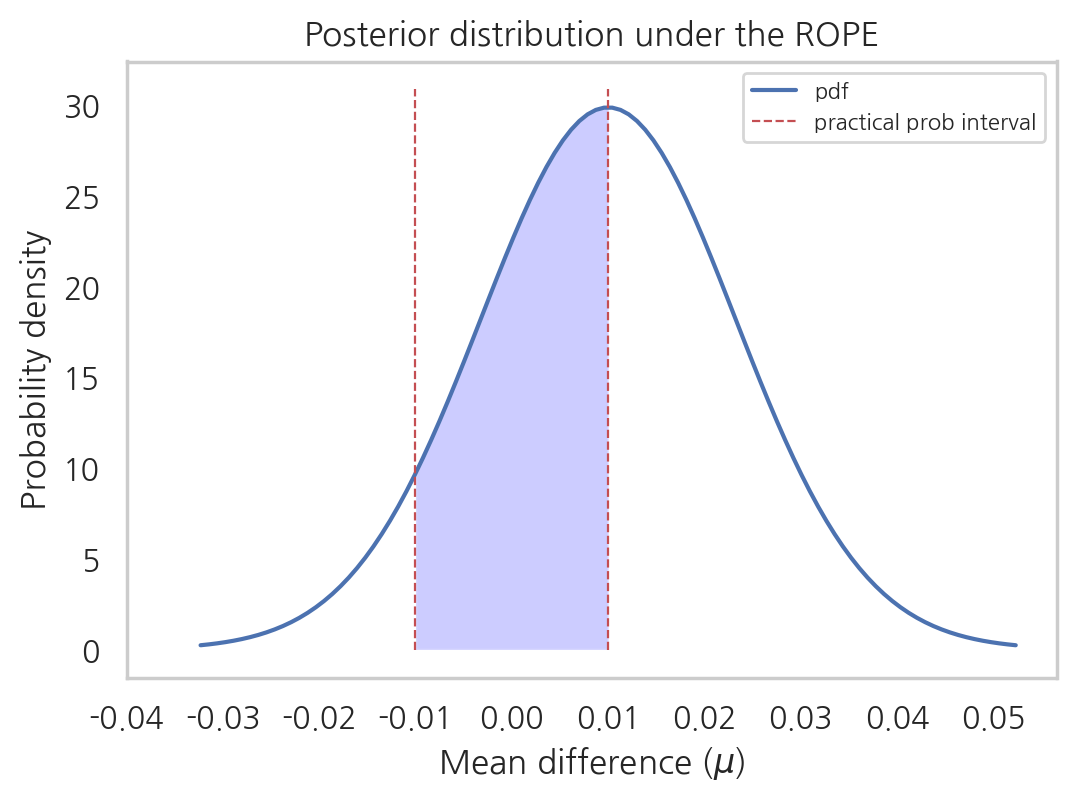

In [45]:
x_rope = np.linspace(rope_interval[0], rope_interval[1])

plt.plot(dist_x, t_post.pdf(dist_x), label="pdf")
plt.fill_between(x_rope, t_post.pdf(x_rope), facecolor="blue", alpha=0.2)
plt.vlines([-0.01, 0.01], ymin=0, ymax=(np.max(t_post.pdf(dist_x)) + 1),
          color="r", linestyle="--", linewidth=0.8, label="practical prob interval")
plt.xticks(np.arange(-0.04, 0.06, 0.01))
plt.xlabel(r"Mean difference ($\mu$)")
plt.ylabel("Probability density")
plt.title("Posterior distribution under the ROPE")
plt.legend(loc="best", fontsize=8)
plt.grid(False)
plt.show() ; 

### 신뢰구간을 사용한 성능 비교
- 모델의 성능차이가 구간 x, y에 있을 확률
- 스튜던트 t 확률변수의 interval 매서드
   - 중앙값 주변의 면적이 동일한 신뢰구간
   - 50%의 구간, 75%의 구간, 95%의 구간
- 구간별 확률(=면적)

In [46]:
cred_intervals = []
intervals = [0.5, 0.75, 0.95]

for interval in intervals : 
    cred_interval = list(t_post.interval(interval))
    cred_intervals.append([interval, cred_interval[0], cred_interval[1]])
    
cred_int_df = pd.DataFrame(
    cred_intervals, 
    columns=["interval", "lower_value", "upper_value"]).set_index("interval")
cred_int_df

,lower_value,upper_value
interval,,
0.50,0.000977,0.019023
0.75,-0.005422,0.025422
0.95,-0.016445,0.036445


## 모든 모델에 대한 빈도주의적 접근방식의 비교
- rank1, rank2 의 성능간 비교 뿐아니라 나머지 모델들과의 비교도 가능
- 통계값을 여러번 계산해야하는 다중비교문제가 발생함
   - 여러 가설을 검증 할 때 생기는 문제로 1종 오류가 발생할 수 있다.
   - 이것을 해결하는 방법으로 Bonferroni 보정을 적용할수 있다.
   - p-value에 테스트 중인 비교총횟수(조합수)를 곱한다.
- pairwise_comp_df 측정 의미
   - p_val : 귀무가설 "model2와 model1의 성능은 같다"에 대한 유의확률
   - rank1 모델인 rbf는 linear, 3_poly 모델과 거의 같다고 할 수 있다.
   - 2_poly 모델은 다른 모델들과 큰 차이가 난다.

In [47]:
from itertools import combinations
from math import factorial

In [49]:
n_comparison = factorial(len(model_scores)) \
                / (factorial(2) * factorial(len(model_scores)) - 2)
n_comparison

0.5217391304347826

In [50]:
pairwise_t_test = []

for model_i, model_k in combinations(range(len(model_scores)), 2) : 
    
    model_i_scores = model_scores.iloc[model_i].values
    model_k_scores = model_scores.iloc[model_k].values
    differences = model_i_scores - model_k_scores
    t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
    # Bonferroni correction p-value
    p_val *= n_comparison
    # 1보다 크면 1로 저장
    p_val = 1 if p_val > 1 else p_val
    pairwise_t_test.append([model_scores.index[model_i], 
                          model_scores.index[model_k],
                          t_stat,
                          p_val])

pairwise_comp_df = pd.DataFrame(
    pairwise_t_test, columns=["model_1", "model_2", "t_test", "p_val"]).round(3)
pairwise_comp_df    

,model_1,model_2,t_test,p_val
0,rbf,linear,0.750,0.119
1,rbf,3_poly,1.657,0.026
2,rbf,2_poly,4.565,0.000
3,linear,3_poly,1.111,0.070
4,linear,2_poly,4.276,0.000
5,3_poly,2_poly,3.851,0.000


### 베이지안 측정은 모든 모델 조합이 적용가능
- rbf가 linear 보다 성능이 안 좋을 확률은 6.8%
- rbf가 linear 보다 성능이 좋을 확률은 50%
- rbf와 linear의 성능이 실질적으로 동일할 확률은 43%
- rbf, linear, 3_poly 모델은 모두 2_poly 모델보다 성능이 좋다.

In [51]:
pairwise_bayesian = []

for model_i, model_k in combinations(range(len(model_scores)), 2) : 
    
    model_i_scores = model_scores.iloc[model_i].values
    model_k_scores = model_scores.iloc[model_k].values
    diff = model_i_scores - model_k_scores
    t_post = t(df, loc=np.mean(diff), scale=corrected_std(diff, n_train, n_test))
    worse_prob = t_post.cdf(rope_interval[0]) 
    better_prob = 1 - t_post.cdf(rope_interval[1])
    rope_prob = t_post.cdf(rope_interval[1]) - t_post.cdf(rope_interval[0])
    
    pairwise_bayesian.append([worse_prob, better_prob, rope_prob])
    
pairwise_bayesian_df = pd.DataFrame(
    pairwise_bayesian, columns=["worse_prob", "better_prob", "rope_prob"]).round(3)
pairwise_comp_df = pairwise_comp_df.join(pairwise_bayesian_df)
pairwise_comp_df

,model_1,model_2,t_test,p_val,worse_prob,better_prob,rope_prob
0,rbf,linear,0.750,0.119,0.068,0.500,0.432
1,rbf,3_poly,1.657,0.026,0.018,0.882,0.100
2,rbf,2_poly,4.565,0.000,0.000,1.000,0.000
3,linear,3_poly,1.111,0.070,0.063,0.750,0.187
4,linear,2_poly,4.276,0.000,0.000,1.000,0.000
5,3_poly,2_poly,3.851,0.000,0.000,1.000,0.000


### 모델 성능의 통계적 비교 요약
- 성능의 작은 차이는 우연이라고 쉽게 판명될 수 있지만, 한 모델이 다른 모델보다 체계적인 시스템에 의해 더 잘 예측했다고 할 수는 없다. 
   - 빈도주의적, 베이지안 접근을 통해서 살펴봤듯이 성능이 유사할 수 있다.
- GCV의 성능을 통계적으로 비교할 때 모델의 점수가 서로 독립적이지 않기 때문에 과소평가될 수 있는 분산을 보정(corrected)해야 한다.
- corrected variance paired t-test(검정)을 사용하는 빈도주의적 접근 방식은 확률(베이지안 추정)보다 확실하게 한 모델의 성능이 다른 모델의 성능보다 나은지 여부를 알려 줄 수 있다.
- 베이지안 접근법은 한 모형이 다른 모형보다 더 낫거나, 나쁘거나, 실질적으로 동등할 확률을 제공해준다. 모형간의 실질적인 차이가 특정 범위의 값에 대한 신뢰구간으로 알려준다. 
   - t_post.interval(0.5), t_post.interval(0.75), t_post.interval(0.95)
- 여러 모델을 통계적으로 비교하는 경우에는 빈도주의적 접근방식을 사용할 때 다중 비교 수정이 필요하다.    